In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/leukemia_dataset.csv")
df.head(5)

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,No,Yes,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,No,No,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,Yes,No,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,No,Yes,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,No,Yes,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


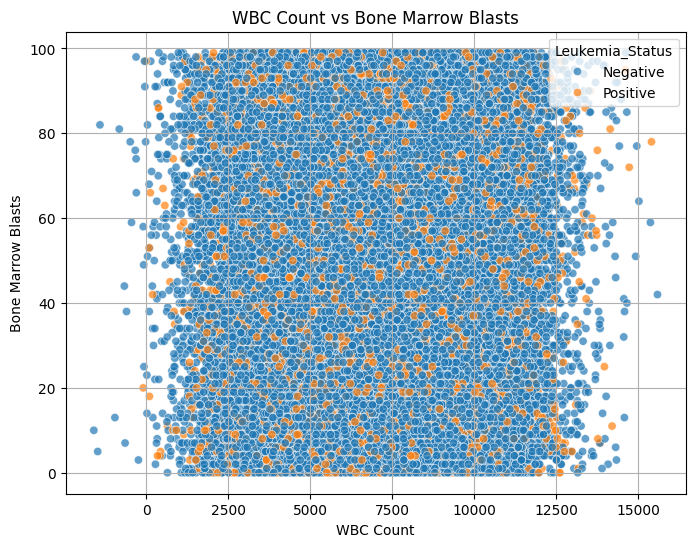

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="WBC_Count",
    y="Bone_Marrow_Blasts",
    hue="Leukemia_Status",
    alpha=0.7
)

plt.title("WBC Count vs Bone Marrow Blasts")
plt.xlabel("WBC Count")
plt.ylabel("Bone Marrow Blasts")
plt.grid(True)
plt.show()

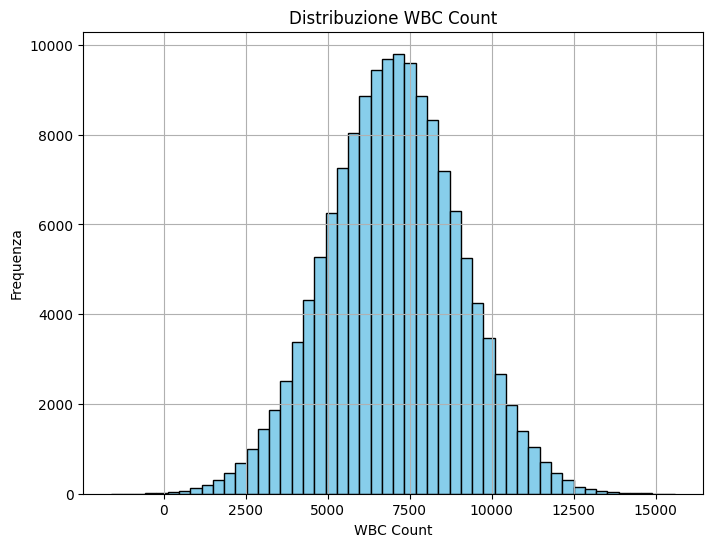

In [7]:
plt.figure(figsize=(8,6))
plt.hist(df["WBC_Count"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribuzione WBC Count")
plt.xlabel("WBC Count")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()


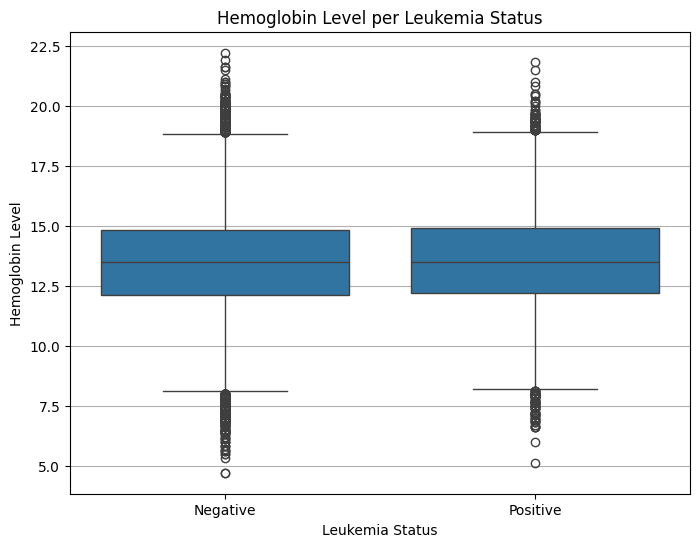

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Leukemia_Status", y="Hemoglobin_Level")
plt.title("Hemoglobin Level per Leukemia Status")
plt.xlabel("Leukemia Status")
plt.ylabel("Hemoglobin Level")
plt.grid(True, axis="y")
plt.show()


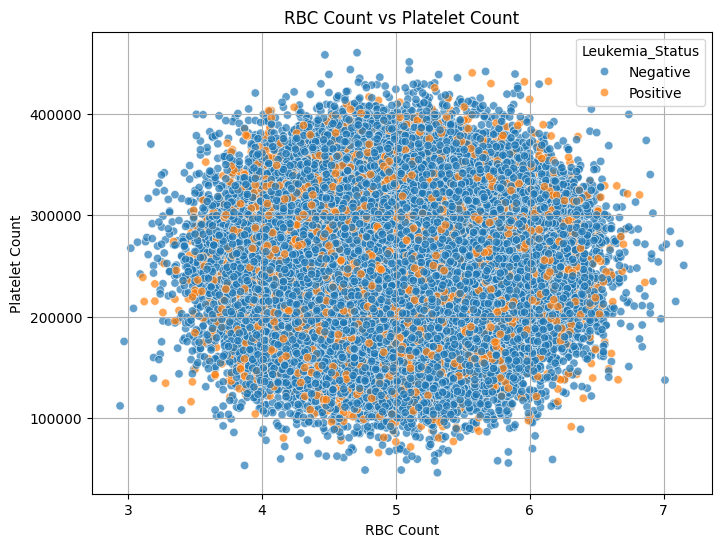

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="RBC_Count", y="Platelet_Count", hue="Leukemia_Status", alpha=0.7)
plt.title("RBC Count vs Platelet Count")
plt.xlabel("RBC Count")
plt.ylabel("Platelet Count")
plt.grid(True)
plt.show()


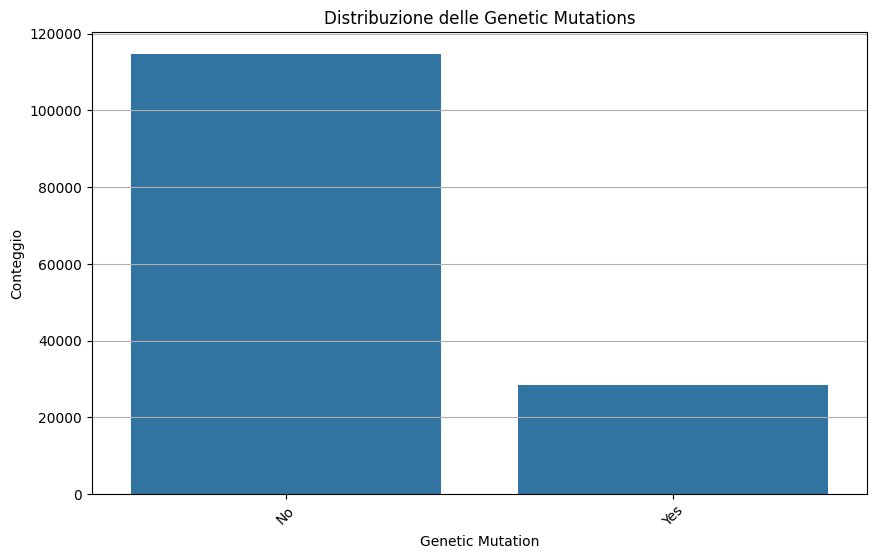

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Genetic_Mutation", order=df["Genetic_Mutation"].value_counts().index)
plt.title("Distribuzione delle Genetic Mutations")
plt.xlabel("Genetic Mutation")
plt.ylabel("Conteggio")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()


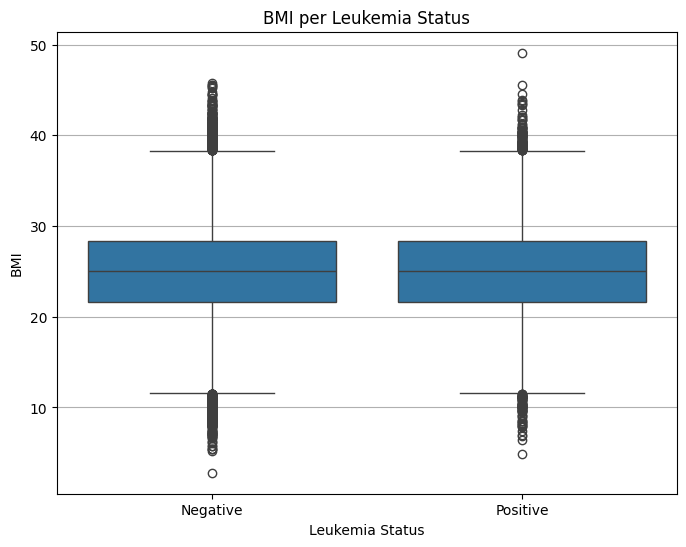

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Leukemia_Status", y="BMI")
plt.title("BMI per Leukemia Status")
plt.xlabel("Leukemia Status")
plt.ylabel("BMI")
plt.grid(True, axis="y")
plt.show()


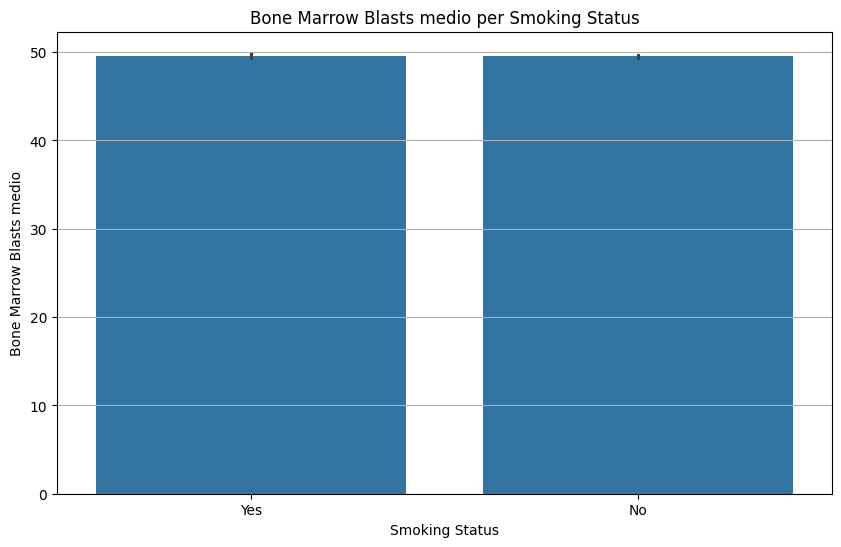

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Smoking_Status", y="Bone_Marrow_Blasts", estimator="mean")
plt.title("Bone Marrow Blasts medio per Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Bone Marrow Blasts medio")
plt.grid(True, axis="y")
plt.show()


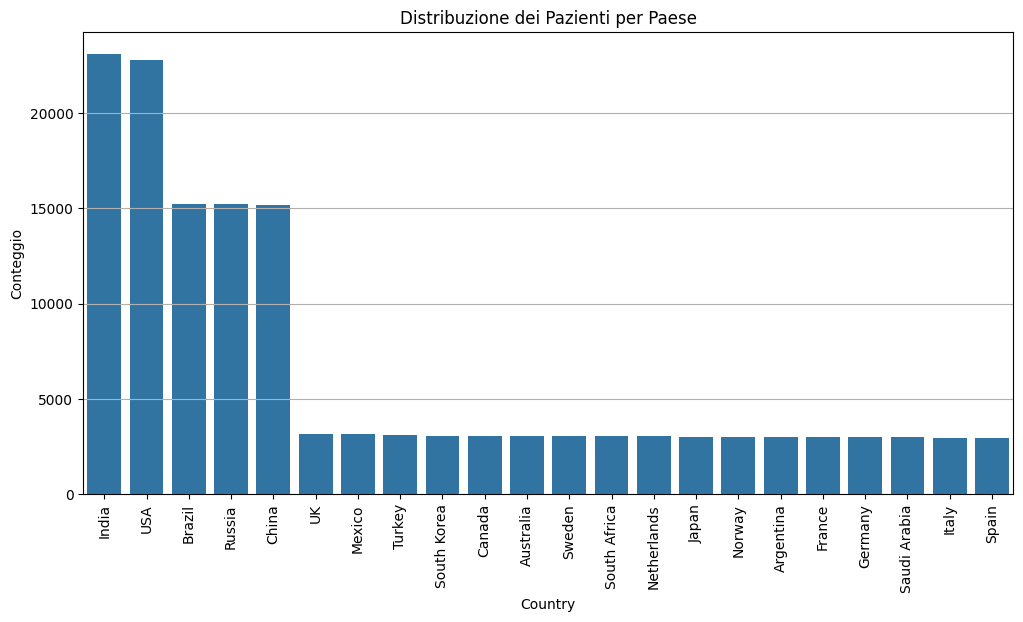

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Country", order=df["Country"].value_counts().index)
plt.title("Distribuzione dei Pazienti per Paese")
plt.xlabel("Country")
plt.ylabel("Conteggio")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.show()


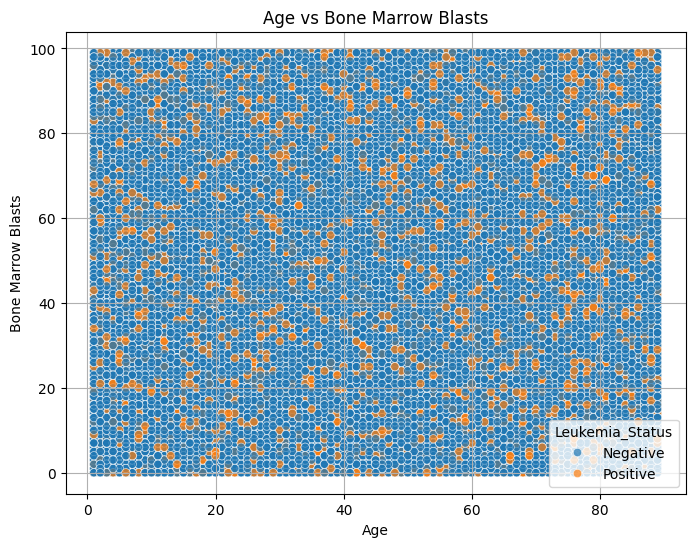

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="Bone_Marrow_Blasts", hue="Leukemia_Status", alpha=0.7)
plt.title("Age vs Bone Marrow Blasts")
plt.xlabel("Age")
plt.ylabel("Bone Marrow Blasts")
plt.grid(True)
plt.show()


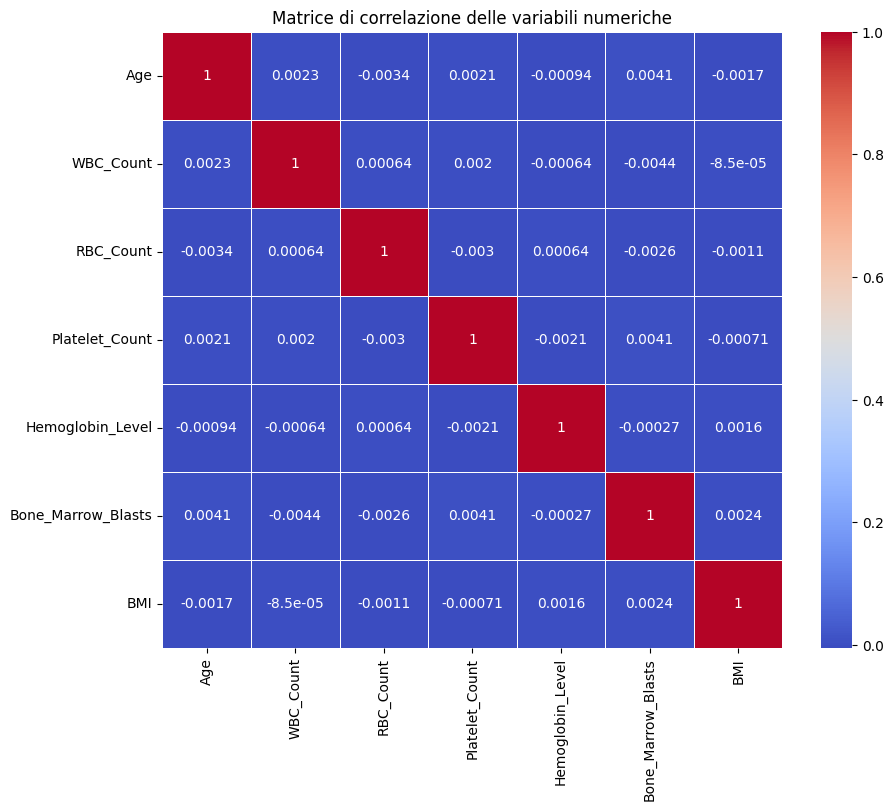

In [16]:
num_cols = ["Age","WBC_Count","RBC_Count","Platelet_Count","Hemoglobin_Level","Bone_Marrow_Blasts","BMI"]
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice di correlazione delle variabili numeriche")
plt.show()
